# N Node TSP Example

The traveling salesperson problem is a longstanding example of the difficulty found in solving combinatorial problems. Despite the simple explanation of the problem, a polynomial-time solution is not known to exist. This example takes 16 random points on the upper right quadrant (30, 30) of the Cartesian plane, calculates the Euclidian distance between them and formulates a sequential model (visit node $x_i$ first, node $x_j$ second and so forth ).

In [1]:
import os.path
import re
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from tsp_utils import tsp_obj_const
from qci_client import QciClient
from eqc_modeling.models.matrix import MatrixModel

In [2]:
def dist(coord1, coord2):
    return np.sqrt(np.sum(np.power(coord1-coord2, 2), axis=1))

In [3]:
def plot_route(coords, solution, N):
    pairs = []
    order = [None for i in range(N)]
    for i in range(N):
        for j in range(N):
            if solution[i*N + j] == 1:
                order[j] = i
    for i in range(N):
        u = order[i-1]
        v = order[i]
        if u is None or v is None:
            continue
        pt1 = coords[u, :]
        pt2 = coords[v, :]
        x = [pt1[0], pt2[0]]
        y = [pt1[1], pt2[1]]
        plt.plot(x, y, "r-")
    plt.scatter(coords[:,0], coords[:, 1], c="k", marker="o")

In [4]:
N = 8
np.random.seed(N)
coords = np.random.randint(1, 30, (N, 2))
distance_matrix = [dist(coords, coords[i]) for i in range(N)]

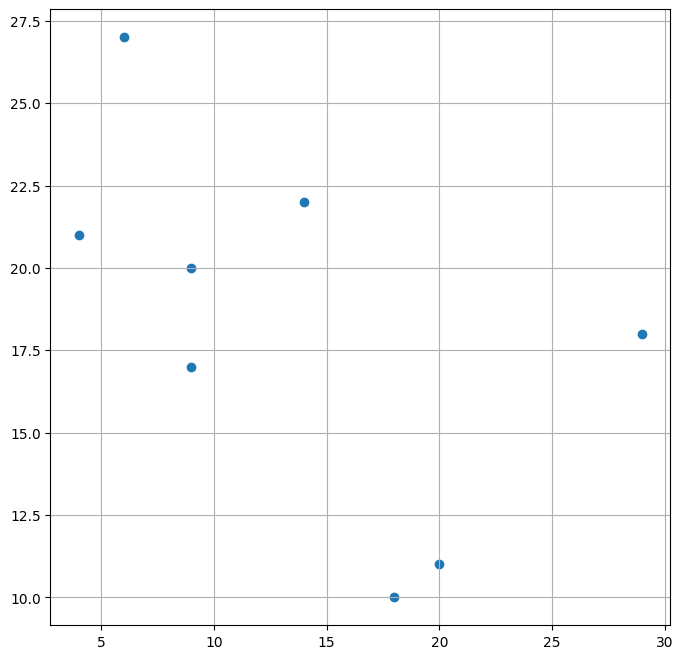

In [5]:
fig = plt.figure(figsize=(8, 8))
plt.scatter(coords[:,0], coords[:, 1])
plt.grid()

In [6]:
objective, lhs, rhs = tsp_obj_const(distance_matrix, scaled=True)

TSP constraint scaling factor:  9.285714285714285


In [7]:
client = QciClient()

In [8]:
mm = MatrixModel(objective, lhs, rhs, [f"x{i}" for i in range(objective.shape[0])])

In [9]:
obj, response = mm.optimize(device="eqc1", alpha=1)
obj

Job submitted job_id='65185cabf25d8eafde752256'-: 2023/09/30 11:36:43
RUNNING: 2023/09/30 11:36:45
COMPLETED: 2023/09/30 11:37:01


71.14072341861151

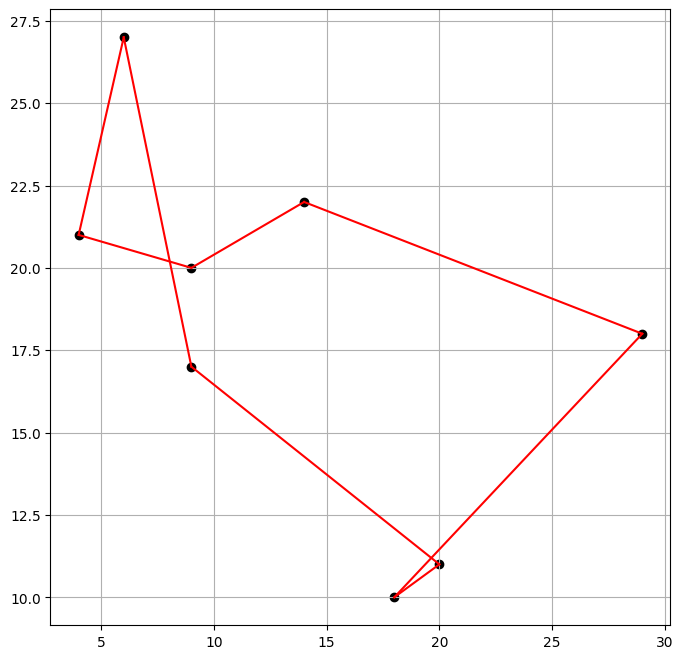

In [10]:
fig = plt.figure(figsize=(8, 8))
plot_route(coords, response["results"]["samples"][0], N)
plt.grid()

In [33]:
[obj for obj, response in responses if response["results"]["is_feasible"][0]]

[191.1715035225476, 195.66255629524915]

In [34]:
alpha = np.sqrt(rhs.T@rhs)[0,0]
alpha

96.9207694746361

In [83]:
J = objective + alpha * lhs.T@lhs 
h = -2 * alpha * rhs.T@lhs
H = np.hstack([h.T, J])
H

array([[-9.29214538e+05,  4.64607269e+05,  2.32303634e+05, ...,
         0.00000000e+00,  0.00000000e+00,  7.76208735e+00],
       [-9.29214538e+05,  2.32303634e+05,  4.64607269e+05, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-9.29214538e+05,  2.32303634e+05,  2.32303634e+05, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       ...,
       [-9.29214538e+05,  0.00000000e+00,  0.00000000e+00, ...,
         4.64607269e+05,  2.32303634e+05,  2.32303634e+05],
       [-9.29214538e+05,  0.00000000e+00,  0.00000000e+00, ...,
         2.32303634e+05,  4.64607269e+05,  2.32303634e+05],
       [-9.29214538e+05,  7.76208735e+00,  0.00000000e+00, ...,
         2.32303634e+05,  2.32303634e+05,  4.64607269e+05]])

In [84]:
h_file_id = client.upload_file(H, file_type="hamiltonian")

In [85]:
body = client.build_job_body(hamiltonian_file_id=h_file_id["file_id"], job_type="sample-hamiltonian",
                             job_name=f"TSP{N}", job_params={"sampler_type": "eqc2", "n_samples": 5, "solution_type": "integer"})

In [86]:
body

{'job_name': 'TSP30',
 'job_tags': [],
 'hamiltonian_file_id': '64a5f431f25d8eafde69ec5e',
 'params': {'sampler_type': 'eqc2',
  'n_samples': 5,
  'solution_type': 'integer'}}

In [87]:
response = client.process_job(job_type="sample-hamiltonian", job_body=body)

Job submitted job_id='64a5f449f25d8eafde69ec75'-: 2023/07/05 16:52:57
RUNNING: 2023/07/05 16:52:59
COMPLETED: 2023/07/05 17:25:51


In [91]:
response["job_info"]

{'job_id': '64a5f449f25d8eafde69ec75',
 'details': {'status': 'COMPLETED',
  'type': 'sample_hamiltonian',
  'organization_id': '5ddf5db3fed87d53b6bf392a',
  'username': 'wdyk'},
 'results': {'file_id': '64a5f817f25d8eafde69ec85'},
 'submission': {'job_name': 'TSP30',
  'hamiltonian_file_id': '64a5f431f25d8eafde69ec5e',
  'params': {'n_samples': 5,
   'sampler_type': 'eqc2',
   'solution_type': 'integer'}},
 'metrics': {'time_ns': {'wall': {'start': 1688597577932702449,
    'end': 1688598552041188543,
    'total': 974108486094,
    'queue': {'total': 728739093291,
     'complete': {'start': 1688598551018408294,
      'end': 1688598551027354207,
      'total': 8945913},
     'dirac_2': {'start': 1688597578304290398,
      'end': 1688598307002801476,
      'total': 728698511078},
     'job_intake': {'start': 1688597577944777109,
      'end': 1688597577957697184,
      'total': 12920075},
     'uber_post_process': {'start': 1688598550649837787,
      'end': 1688598550660646811,
      'tot

In [92]:
samples = np.array(response["results"]["samples"])

In [94]:
samples.shape

(5, 900)

/Users/wesleydyk/Documents/working_copies/eqc-modeling/src/eqc_modeling/modelanalysis/penaltyparameterplot.py:90: UserWarning: Legend does not support handles for list instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#controlling-the-legend-entries
  ax.legend(legend_handles, legend_labels)


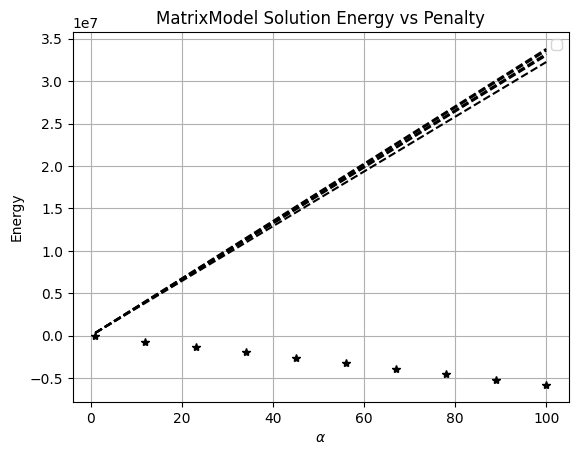

In [96]:
fig = plot.plot(samples, includeoffset=False)

In [99]:
samples.sum(axis=1)

array([100, 100, 100, 100, 100])

In [36]:
np.round(samples[0] / 2)

array([0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 2., 0., 0.,
       0., 0., 0., 1., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0.,
       0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0.])

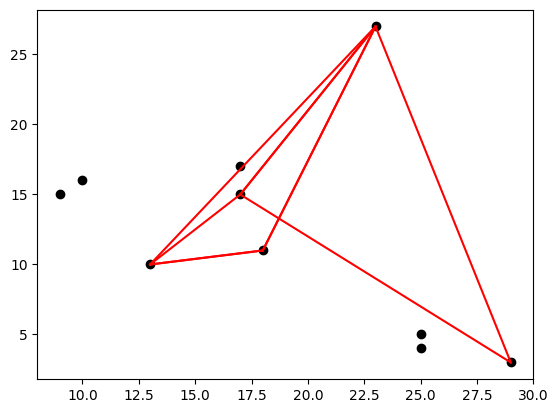

In [38]:
plot_route(coords, np.round(samples[0] / 2), N)